# Analyzing Data

## Prison Helicopter Escapes

We begin by importing some helper function

In [14]:
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes] (https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [15]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)
index = 0
for row in data:
    del row[-1] 

Let's print the first three rows

In [16]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


## Data Cleanup

Let's pull out the date as just a year

In [17]:
for row in data:
    row[0] = fetch_year(row[0])

Looks much cleaner now.

In [32]:
for row in data[:3]:
    print(row)

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
[1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
[1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


## Initial Analysis

### The first analysis is the number of helicopter escape attempts per year

First let's get a list of all years there were helicopter escapes

In [43]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


A way to double check the minimum and maximum years

In [44]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
print (min_year)
print (max_year)

1971
2020


Now we can create an attempts per year variable

In [35]:
attempts_per_year = []
for year in years:
    attempts_per_year.append([year, 0])

And tally the number of attempts per year

In [37]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1
            
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


A bar chart of these results would be easier to understand

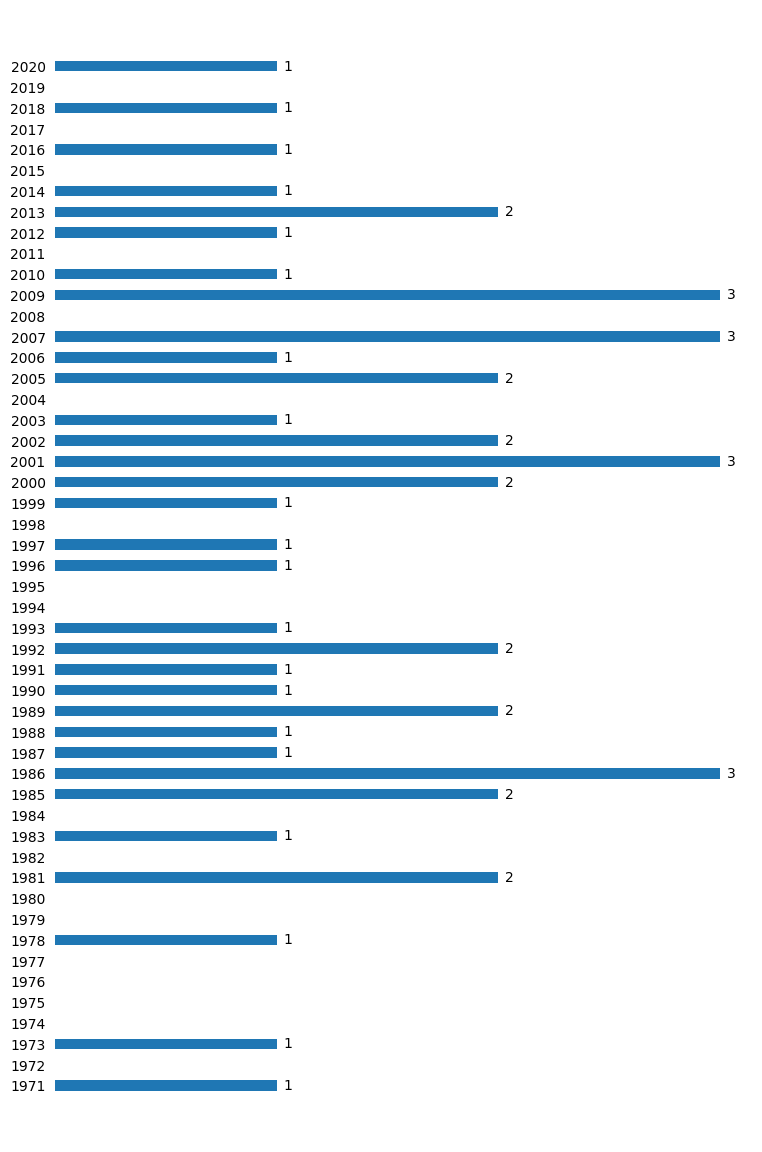

In [38]:
%matplotlib inline
barplot(attempts_per_year)

It is clear from this chart the most escape attempts were 4 per year in 1986, 2001, 2007, and 2009

### The second analysis is the countries with the most helicopter escape attempts

First we generate a count of occurrences for each county

In [47]:
countries_frequency = df["Country"].value_counts()
print (countries_frequency)

France            15
United States      8
Greece             4
Belgium            4
Canada             4
Australia          2
Brazil             2
United Kingdom     2
Russia             1
Mexico             1
Netherlands        1
Italy              1
Puerto Rico        1
Chile              1
Ireland            1
Name: Country, dtype: int64


A helper function will display the results in a prettier table

In [46]:
print_pretty_table (countries_frequency)

It is clear from this table that